In [1]:
!pip list


Package                           Version
--------------------------------- ------------------
aext-assistant                    4.0.15
aext-assistant-server             4.0.15
aext-core                         4.0.15
aext-core-server                  4.0.15
aext-panels                       4.0.15
aext-panels-server                4.0.15
aext-share-notebook               4.0.15
aext-share-notebook-server        4.0.15
aext-shared                       4.0.15
aiobotocore                       2.12.3
aiohttp                           3.9.5
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.16
altair                            5.0.1
anaconda-anon-usage               0.4.4
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.5.1
anaconda-navigator                2.6.0
anaconda-project                  0.11.1
annotated-types                   0.6.0
anyio       

In [8]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np


# a) Loading the dataset
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv'
data = pd.read_csv(url)
print("csv files data")
display(data.head())
print("Loaded Dataset:")
print(data.head())

# b) Identifying independent (X) and dependent (y) variables
X = data.drop('species', axis=1)  # Features
y = data['species']              # Target

print("\nIndependent Variables (X):")
print(X.head())

print("\nDependent Variable (y):")
print(y.head())

# Simulate missing data (for demonstration only)
# Introduce a missing value manually (simplified)
X= X.dropna()

# Check data with missing value
print("Data with missing value:")
print(X.head())

# Handle missing data using mean imputation
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Convert back to DataFrame
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)

print("\nData after imputation:")
display(X_imputed_df.head())


csv files data


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Loaded Dataset:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Independent Variables (X):
   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

Dependent Variable (y):
0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object
Data with missing value:
   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Load dataset
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv'
data = pd.read_csv(url)

# a) Dealing with categorical data (Label Encoding)
label_encoder = LabelEncoder()
data['species'] = label_encoder.fit_transform(data['species'])

# Separate features and target
X = data.drop('species', axis=1)
y = data['species']
print(X,y)
# b) Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled,'Build a classification model using Decision Tree algorithm on iris dataset')

# c) Splitting dataset into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns] 0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64
[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.3

In [31]:
import numpy as np
from scipy.spatial.distance import euclidean, cityblock
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import pearsonr
from sklearn.metrics import jaccard_score

# Define numeric vectors for Pearson, Cosine, Euclidean, Manhattan
a = np.array([1, 2, 3, 4, 5])
b = np.array([2, 4, 6, 8, 10])

# Define binary vectors for Jaccard Similarity
a_bin = np.array([1, 0, 1, 1, 0])
b_bin = np.array([1, 1, 1, 0, 0])

# a) Pearson’s Correlation
pearson_corr, _ = pearsonr(a, b)

# b) Cosine Similarity
cos_sim = cosine_similarity(a.reshape(1, -1), b.reshape(1, -1))[0][0]

# c) Jaccard Similarity (binary vectors)
jaccard_sim = jaccard_score(a_bin, b_bin)

# d) Euclidean Distancezz
euclidean_dist = euclidean(a, b)

# e) Manhattan Distance
manhattan_dist = cityblock(a, b)

# Display results
print("=== Similarity & Dissimilarity Measures ===")
print(f"1. Pearson's Correlation      : {pearson_corr:.4f}")
print(f"2. Cosine Similarity          : {cos_sim:.4f}")
print(f"3. Jaccard Similarity (binary): {jaccard_sim:.4f}")
print(f"4. Euclidean Distance         : {euclidean_dist:.4f}")
print(f"5. Manhattan Distance         : {manhattan_dist}")


=== Similarity & Dissimilarity Measures ===
1. Pearson's Correlation      : 1.0000
2. Cosine Similarity          : 1.0000
3. Jaccard Similarity (binary): 0.5000
4. Euclidean Distance         : 7.4162
5. Manhattan Distance         : 15


=== Linear Regression on Iris Dataset ===
Features used: ['sepal length (cm)', 'sepal width (cm)', 'petal width (cm)']
Target: petal length (cm)
Coefficients: [ 0.72281463 -0.63581649  1.46752403]
Intercept: -0.26219590258870085
Mean Squared Error: 0.13
R² Score: 0.9603


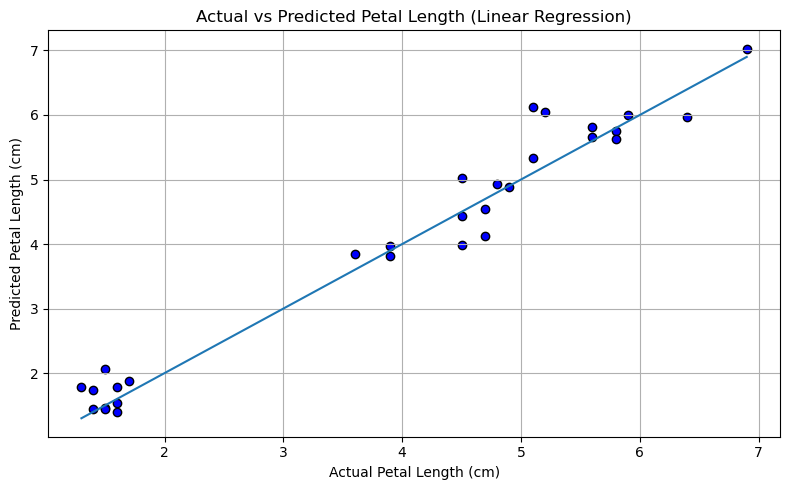

In [13]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = X['petal length (cm)']  # Target = petal lengthimport matplotlib.pyplot as plt

# Plotting actual vs predicted values


X = X.drop(columns=['petal length (cm)'])  # Remove target from input

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) 

# Output
print("=== Linear Regression on Iris Dataset ===")
print("Features used:", list(X.columns))
print("Target: petal length (cm)")
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", round(mse, 4))
print("R² Score:", round(r2, 4))
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Petal Length (cm)')
plt.ylabel('Predicted Petal Length (cm)')
plt.title('Actual vs Predicted Petal Length (Linear Regression)')
plt.grid(True)
plt.tight_layout()
plt.show()

=== Decision Tree Classifier on Iris Dataset ===
Accuracy Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


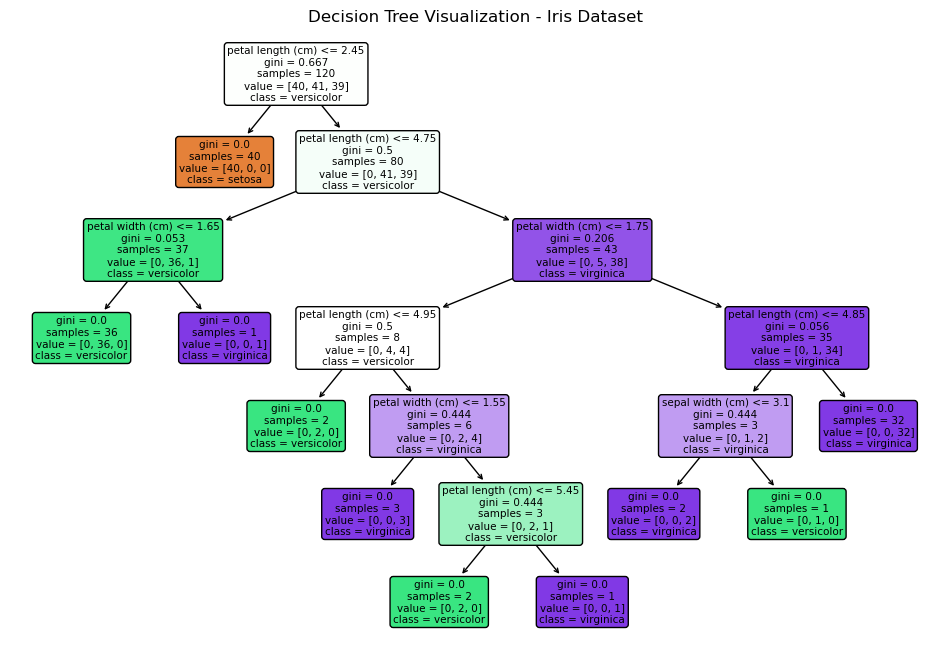

In [9]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# 1. Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

# 2. Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# 3. Initialize and train Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# 4. Make predictions
y_pred = clf.predict(X_test)

# 5. Evaluate the model
print("=== Decision Tree Classifier on Iris Dataset ===")
print("Accuracy Score:", round(accuracy_score(y_test, y_pred), 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(clf,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True, rounded=True)
plt.title("Decision Tree Visualization - Iris Dataset")
plt.show()


In [5]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# 3. Create and train Naïve Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# 4. Predict on test data
y_pred = model.predict(X_test)

# 5. Evaluate model
print("=== Naïve Bayes Classifier on Iris Dataset ===")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


=== Naïve Bayes Classifier on Iris Dataset ===
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [41]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# 1. Sample market basket data (can be replaced with CSV data too)
transactions = [
    ['milk', 'bread', 'nuts', 'apple'],
    ['milk', 'bread', 'nuts'],
    ['milk', 'bread'],
    ['milk', 'apple'],
    ['bread', 'nuts']
]

# 2. Convert to one-hot encoded DataFrame
te = TransactionEncoder()
te_data = te.fit_transform(transactions)
df = pd.DataFrame(te_data, columns=te.columns_)

# 3. Generate frequent item sets
frequent_itemsets = apriori(df, min_support=0.4, use_colnames=True)

# 4. Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

# 5. Display results
print("=== Frequent Itemsets ===")
print(frequent_itemsets)

print("\n=== Association Rules ===")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

=== Frequent Itemsets ===
   support             itemsets
0      0.4              (apple)
1      0.8              (bread)
2      0.8               (milk)
3      0.6               (nuts)
4      0.4        (apple, milk)
5      0.6        (milk, bread)
6      0.6        (nuts, bread)
7      0.4         (milk, nuts)
8      0.4  (milk, nuts, bread)

=== Association Rules ===
     antecedents    consequents  support  confidence      lift
0        (apple)         (milk)      0.4    1.000000  1.250000
1         (milk)        (bread)      0.6    0.750000  0.937500
2        (bread)         (milk)      0.6    0.750000  0.937500
3         (nuts)        (bread)      0.6    1.000000  1.250000
4        (bread)         (nuts)      0.6    0.750000  1.250000
5         (nuts)         (milk)      0.4    0.666667  0.833333
6   (milk, nuts)        (bread)      0.4    1.000000  1.250000
7  (milk, bread)         (nuts)      0.4    0.666667  1.111111
8  (nuts, bread)         (milk)      0.4    0.666667  0.8333

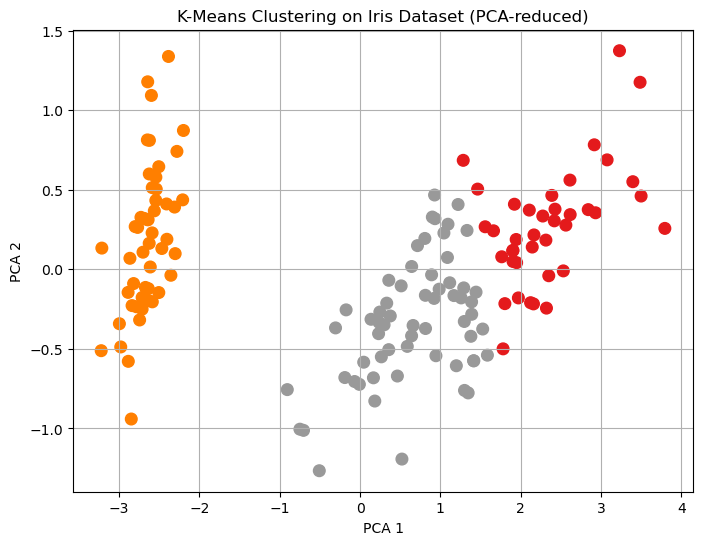

In [5]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# 1. Load Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

# 2. Apply KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# 3. Assign clusters to data
X['cluster'] = kmeans.labels_

# 4. Optional: Reduce dimensions to 2D for plotting using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.iloc[:, :-1])
X['pca1'] = X_pca[:, 0]
X['pca2'] = X_pca[:, 1]

# 5. Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X['pca1'], X['pca2'], c=X['cluster'], cmap='Set1', s=70)
plt.title('K-Means Clustering on Iris Dataset (PCA-reduced)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()


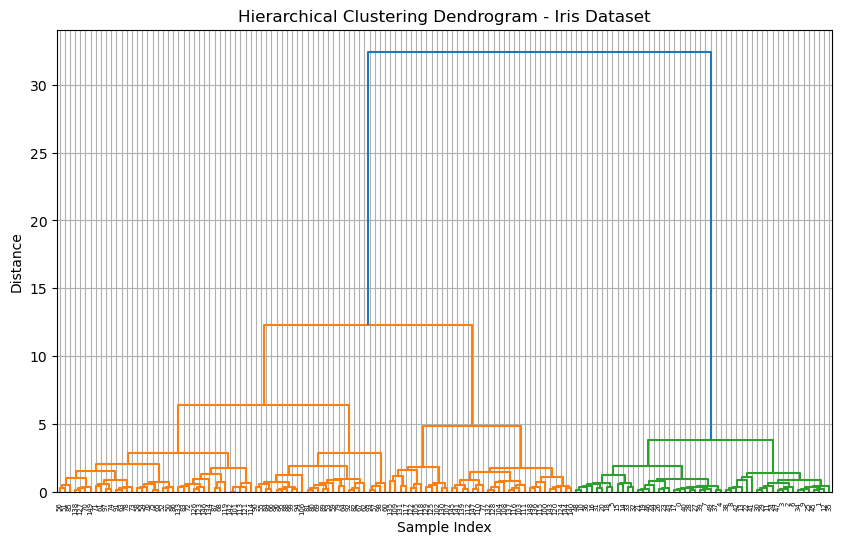

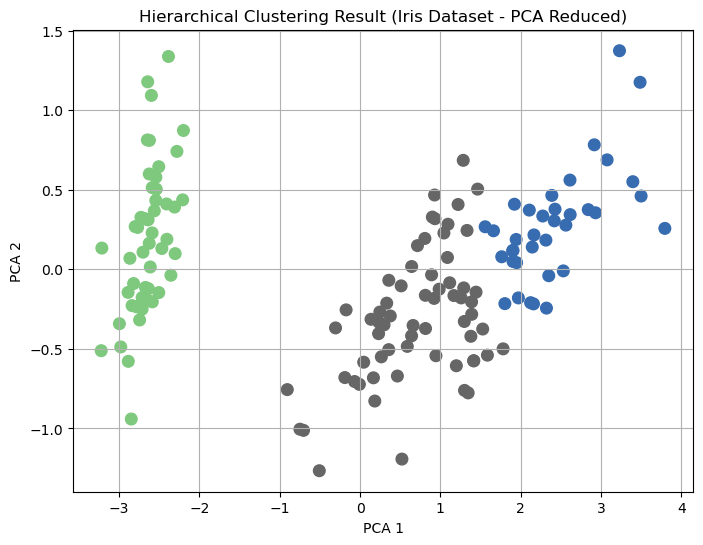

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.decomposition import PCA

# 1. Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

# 2. Compute the linkage matrix
linked = linkage(X, method='ward')  # You can use 'single', 'complete', or 'average' too

# 3. Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram - Iris Dataset')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

# 4. Assign clusters (cutting dendrogram at 3 clusters)
clusters = fcluster(linked, 3, criterion='maxclust')
X['cluster'] = clusters

# 5. Optional: Reduce dimensions for visualization (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.iloc[:, :-1])
X['pca1'] = X_pca[:, 0]
X['pca2'] = X_pca[:, 1]

# 6. Plot clusters
plt.figure(figsize=(8, 6))
plt.scatter(X['pca1'], X['pca2'], c=X['cluster'], cmap='Accent', s=70)
plt.title('Hierarchical Clustering Result (Iris Dataset - PCA Reduced)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()


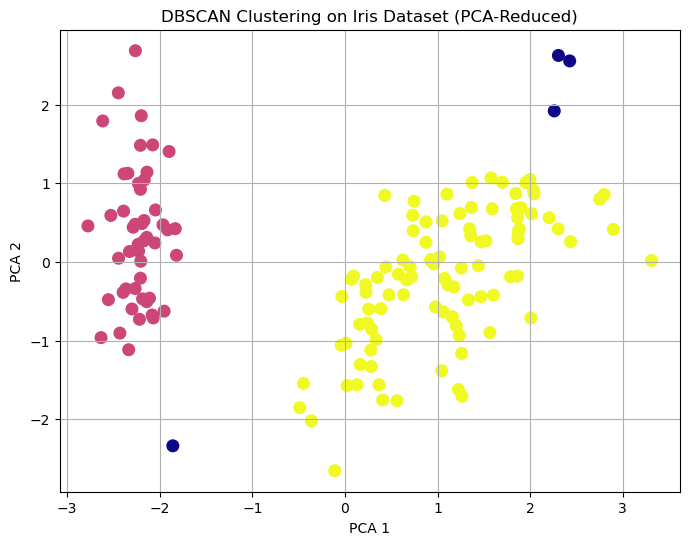

Number of noise points: 4


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# 1. Load the Iris    
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

# 2. Standardize the features (very important for DBSCAN!)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

# 4. Add cluster results to DataFrame
X['cluster'] = clusters

# 5. Reduce dimensions for visualization using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X['pca1'] = X_pca[:, 0]
X['pca2'] = X_pca[:, 1]

# 6. Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X['pca1'], X['pca2'], c=X['cluster'], cmap='plasma', s=70)
plt.title('DBSCAN Clustering on Iris Dataset (PCA-Reduced)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()

# Optional: View how many points were considered noise
n_noise = list(clusters).count(-1)
print(f"Number of noise points: {n_noise}")
